## <font color='blue'>**Clustering Algorithm**

### <font color='black'>**Learning Objectives**</font>
1. Generate a 2 dimensional blobs dataset using scikit learn’s make_blobs. Use 4 or 5 centers.  

2. Implement K-means algorithm from scratch to cluster this dataset.  

3. Pick the number of clusters using the elbow method. Show the variation of the WCSS as a function of the number of clusters.  

4. Show the clustering result as a scatter plot using different colors for each cluster.  

5. Compare the result obtained with scikit-learn's implementation of K-means.

6. Illustrate hierarchical agglomerative clustering from scratch on this dataset using Euclidean distance and complete linkage.   

7. Compare the from scratch implementation with sklearn’s implementation.  

8. Show the dendogram associated with the agglomerative clustering.  

9. Show the clustering result by picking the number of clusters equal to the number of blobs for the from scratch implementation and sklearn (show them side by side).  

##2 dimensional blobs dataset generation

    Feature 1  Feature 2
0   -0.800488   0.652017
1   -2.119874   0.467654
2   -7.252525  -8.472593
3   -6.158548  -2.747510
4   -9.904432  -3.748323
..        ...        ...
95  -2.730626  -0.104010
96  -9.937633  -3.644747
97  -9.854919  -3.510778
98  -6.465423  -8.060650
99  -6.428004  -7.169677

[100 rows x 2 columns]


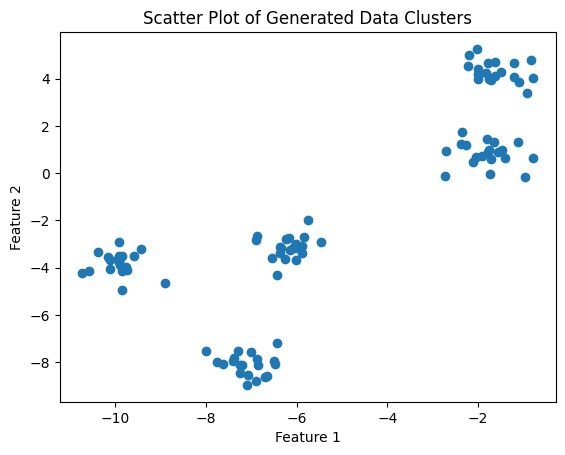

In [5]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a random dataset with blob-like clusters
# n_samples: total number of data points
# n_features: number of features for each data point
# centers: number of clusters to generate
# cluster_std: standard deviation of the clusters, controls the spread of each cluster
# random_state: seed for reproducibility
dataset, classes = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=0.5, random_state=1)

# Create a DataFrame with the generated data
df = pd.DataFrame(dataset, columns=['Feature 1', 'Feature 2'])

# Display the first few rows of the DataFrame to understand the data structure
print(df)

# Plot the data points in a scatter plot
plt.scatter(df['Feature 1'], df['Feature 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Generated Data Clusters')
plt.show()

##K-means from scratch

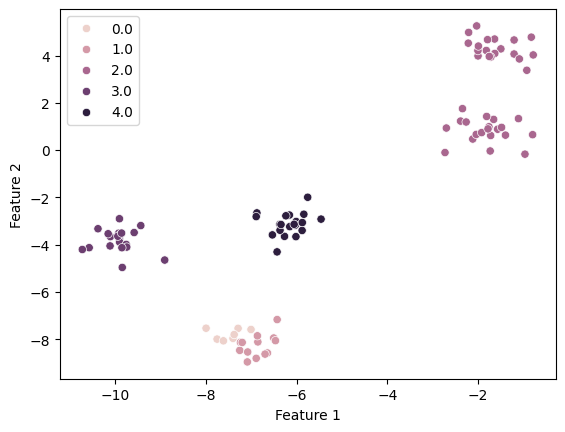

In [6]:
import numpy as np

# Function to perform K-means clustering from scratch
def KMeans_from_scratch(input=None, clusters=3, tolerance=1e-3, max_iterations=10):
    num_samples = input.shape[0]
    centroids = []
    sample_clusters = np.zeros(num_samples)

    # Initialize random samples as initial centroids
    for i in range(clusters):
        random_sample_number = np.random.randint(num_samples)
        while random_sample_number in centroids:
            random_sample_number = np.random.randint(num_samples)
        centroids.append(np.random.randint(num_samples))

    # Convert centroid indices to actual data points
    for i in range(len(centroids)):
        centroids[i] = input[centroids[i]]
    centroids = np.array(centroids)

    # K-means algorithm
    iteration = 0
    prev_centroids = np.zeros_like(centroids)

    # Run until convergence or maximum iterations
    while (iteration < max_iterations) and (np.linalg.norm(centroids - prev_centroids) > tolerance):
        prev_centroids = centroids.copy()

        # Assign each sample to the closest centroid
        for i in range(num_samples):
            for j in range(clusters):
                if j == 0:
                    least_distance = np.linalg.norm(input[i] - centroids[j])
                    sample_clusters[i] = j
                else:
                    distance = np.linalg.norm(input[i] - centroids[j])
                    if distance < least_distance:
                        least_distance = distance
                        sample_clusters[i] = j

        # Update centroids by calculating the mean of assigned samples
        for i in range(clusters):
            sum = 0.0
            num = 0
            for j in range(num_samples):
                if sample_clusters[j] == i:
                    sum += input[j]
                    num += 1
            centroids[i] = sum / num
        iteration += 1

    return centroids

# Run the K-means algorithm
centroids = KMeans_from_scratch(np.array(df), clusters=5)

# Function to assign samples to the closest centroid
def assign_clusters(input=None, centroids=None):
    num_samples = input.shape[0]
    clusters = centroids.shape[0]
    sample_clusters = np.zeros(num_samples)

    for i in range(num_samples):
        for j in range(clusters):
            if j == 0:
                least_distance = np.linalg.norm(input[i] - centroids[j])
                sample_clusters[i] = j
            else:
                distance = np.linalg.norm(input[i] - centroids[j])
                if distance < least_distance:
                    least_distance = distance
                    sample_clusters[i] = j

    return sample_clusters

# Assign clusters to samples based on final centroids
sample_clusters = assign_clusters(np.array(df), centroids)

# Plot clusters with Seaborn
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue=sample_clusters)
plt.show()

##K-means in sklearn and centroid visualization

Time taken: 0.06696939468383789


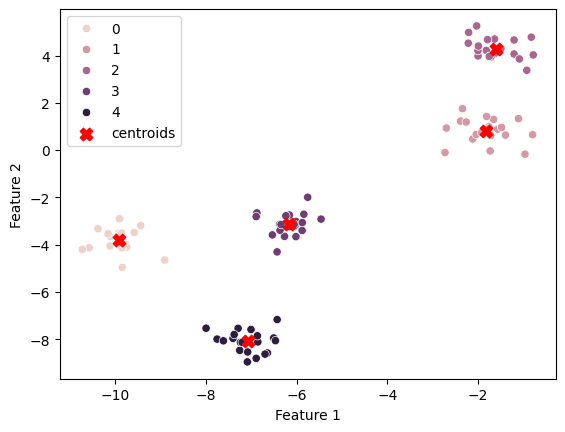

In [7]:
from sklearn.cluster import KMeans
import time

# Initialize KMeans clustering with 5 clusters and random centroid initialization
kmeans = KMeans(n_clusters=5, init='random', random_state=1)

# Record the starting time before fitting the model
starting_time = time.time()
kmeans.fit(df)  # Fit the KMeans model on the dataset
ending_time = time.time()  # Record the ending time after fitting

# Calculate and print the time taken to fit the model
print("Time taken: " + str(ending_time - starting_time))

# Plot the clustered data
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue=kmeans.labels_)
# Plot the cluster centroids with a distinct marker
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

##Elbow method, using Within Clusters Sum of Squares (WCSS)

1 2846.5300716544302
2 603.7111973512078
3 305.83525006332206
4 160.9422029506187
5 39.440748066083216
6 36.19341315957499
7 33.70100353566085
8 30.707377408568853
9 27.616883649768607
10 26.837416994282886


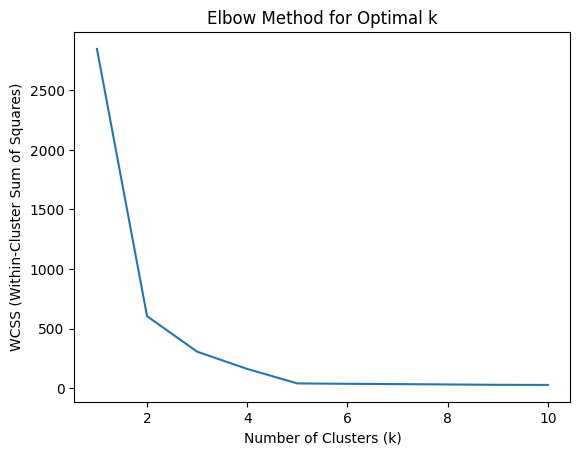

In [8]:
def elbow(input, k_values=[1, 2, 3, 4, 5, 6, 7, 8, 9]):
    wcss_values = []  # List to store within-cluster sum of squares (WCSS) for each k

    # Iterate over different values of k (number of clusters)
    for k_value in k_values:
        sum = 0.0
        # Fit KMeans with the current number of clusters
        kmeans = KMeans(n_clusters=k_value, init='random', random_state=1).fit(input)

        # Calculate WCSS by summing squared distances of each point to its cluster center
        for i in range(k_value):
            for j in range(input.shape[0]):
                if kmeans.labels_[j] == i:
                    sum += np.linalg.norm(input[j] - kmeans.cluster_centers_[i]) ** 2.0
        wcss_values.append(sum)  # Append WCSS for the current k to the list

    return wcss_values

# Define the range of k values to test for optimal clustering
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Compute WCSS for each k value using the elbow function
wcss_values = elbow(np.array(df), k_values=k_values)

# Print WCSS values for each k to analyze the results
for i in range(len(wcss_values)):
    print(k_values[i], wcss_values[i])

# Plot the elbow curve to visualize the optimal k value
plt.plot(k_values, wcss_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

##Hierarchical Agglomerative Clustering from Scratch

Time taken: 3.005216121673584


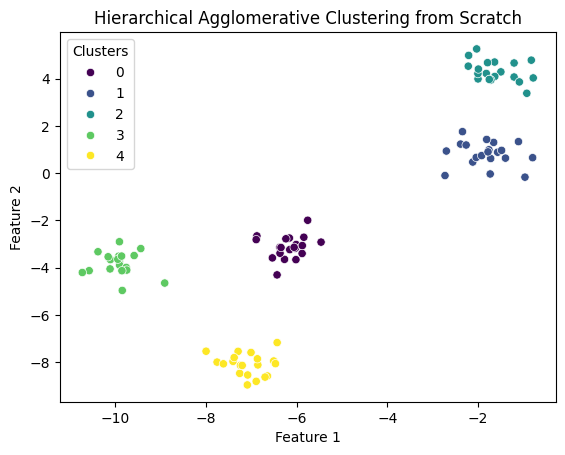

In [11]:
import time
from scipy.spatial.distance import cdist

# Custom Euclidean distance function
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Complete linkage function: maximum distance between all pairs of points in two clusters
def complete_linkage(cluster1, cluster2):
    distances = cdist(cluster1, cluster2, metric='euclidean')
    return np.max(distances)


def hac_from_scratch(data, num_clusters):
    clusters = [[i] for i in range(len(data))]  # Each data point starts as its own cluster
    cluster_labels = np.arange(len(data))  # Initialize cluster labels

    # Continue until the target number of clusters is reached
    while len(clusters) > num_clusters:
        min_distance = float('inf')
        merge_clusters = (None, None)

        # Find the two closest clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1_points = data[clusters[i]]
                cluster2_points = data[clusters[j]]
                distance = complete_linkage(cluster1_points, cluster2_points)
                if distance < min_distance:
                    min_distance = distance
                    merge_clusters = (i, j)

        # Merge the two closest clusters
        cluster1, cluster2 = merge_clusters
        clusters[cluster1].extend(clusters[cluster2])
        del clusters[cluster2]  # Remove the merged cluster

        # Assign a new contiguous label
        new_label = len(clusters)  # This will be the index of the merged cluster in the list
        for idx in clusters[cluster1]:
            cluster_labels[idx] = new_label

    # Final adjustment to ensure labels are contiguous
    unique_labels = np.unique(cluster_labels)
    for new_label, old_label in enumerate(unique_labels):
        cluster_labels[cluster_labels == old_label] = new_label

    return cluster_labels


# Dataset generation
data = np.array(df)  # Convert the DataFrame to a numpy array
num_clusters = 5

# Measure the time taken for clustering
starting_time = time.time()
labels = hac_from_scratch(data, num_clusters)
ending_time = time.time()

# Display time taken
print("Time taken: " + str(ending_time - starting_time))

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Plotting the clusters with seaborn for similar visualization
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Cluster", palette="viridis")
plt.legend(title="Clusters")
plt.title("Hierarchical Agglomerative Clustering from Scratch")
plt.show()

##Sklearn implementation of Agglomerative Clustering

Time taken: 0.006872892379760742


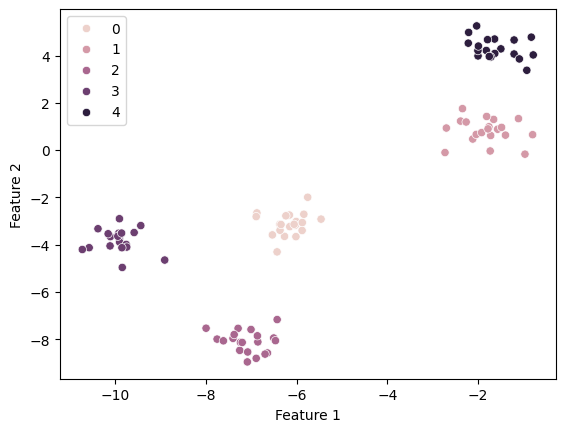

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model with 5 clusters, using Euclidean distance and complete linkage
clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')

# Record the start time, fit the model, and record the end time to measure performance
starting_time = time.time()
clustering_model.fit(df)
ending_time = time.time()

# Print the time taken to perform clustering
print("Time taken: " + str(ending_time - starting_time))

# Visualize the clustered data points
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue=clustering_model.labels_)
plt.legend()
plt.show()

##Dendogram visualization

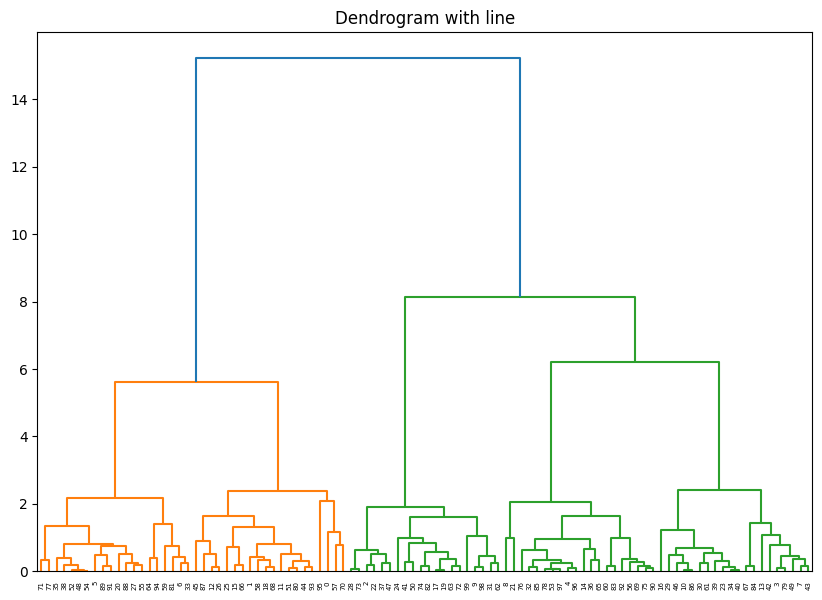

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Set up the figure size and title for the dendrogram plot
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with line")

# Perform hierarchical clustering using the 'complete' linkage method and 'euclidean' distance metric
clusters = shc.linkage(df, method='complete', metric="euclidean")

# Plot the dendrogram for visualizing cluster hierarchy
shc.dendrogram(clusters)

# Draw a horizontal line at a specified height (y=73) to indicate the cluster cutoff point
plt.axhline(y=73, color='r', linestyle='-')
plt.show()

##Sklearn and Scratch implementation comparison of HAC

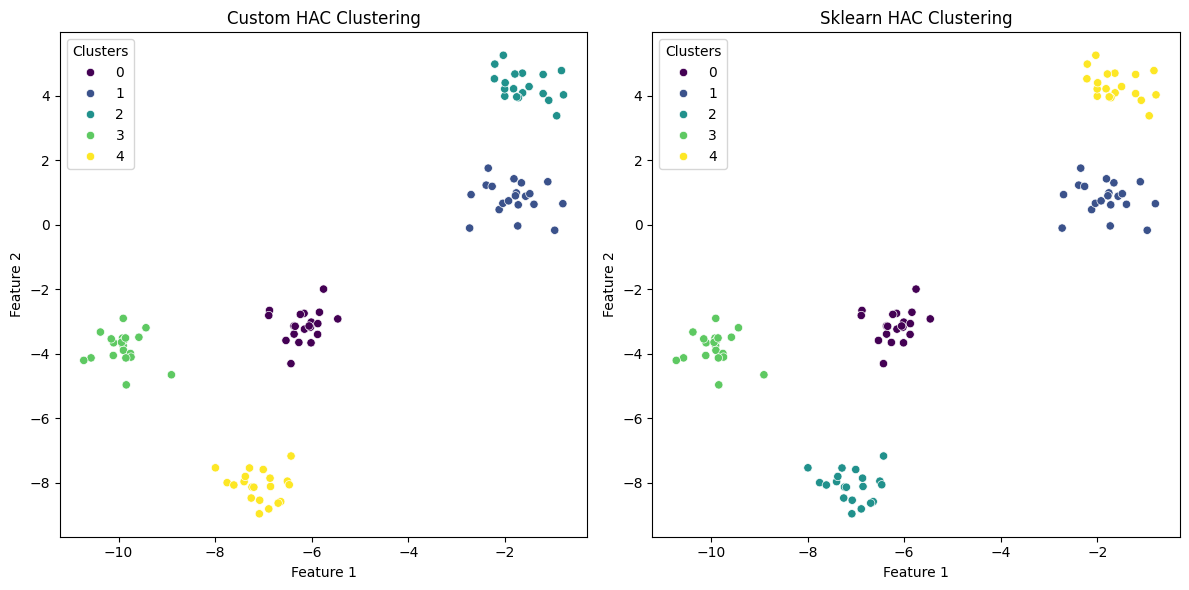

In [ ]:
# Visualization of clustering results side by side
plt.figure(figsize=(12, 6))

# Custom Implementation Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue= "Cluster", palette="viridis", legend="full")
plt.title("Custom HAC Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Clusters")

# Sklearn Implementation Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue=clustering_model.labels_, palette="viridis", legend="full")
plt.title("Sklearn HAC Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Clusters")

plt.tight_layout()
plt.show()

## **LAB Assignment 9**

### <font color='blue'> Task - 1 [Marks 0] </font>:
Load and preprocess the UCI [Vehicle silhouettes](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes) - there are 18 features in this dataset

In [ ]:
#Solution code

### <font color='blue'> Task - 2 [Marks 1] </font>:

1. Check for duplicate and missing features and handle such cases as necessary.  

2. Partition the data into training, and test sets (80%-20%).  

In [ ]:
#Solution code

### <font color='blue'> Task - 3 [Marks 5] </font>:

1. Perform HAC from scratch using Euclidean distance and average linkage on the training set.  

2. Derive 4 clusters from the from your implementation of HAC and assign all points to their closest clusters.  

In [ ]:
#Solution code

### <font color='blue'> Task - 4 [Marks 4] </font>:

Perform clustering using sklearn’s implementation with the same hyperparameters.

In [ ]:
#Solution code

### <font color='blue'> Task - 5 [Marks 2] </font>:

Show the corresponding dendogram.  

In [ ]:
#Solution code

### <font color='blue'> Task - 6 [Marks 4] </font>:

For both the from scratch and sklearn implementation, rename the labels consistently such that the label for the clusters having the smallest to largest centroids are assigned labels ‘0’ to ‘3’ (this is because label names in from scratch implementation and scikit-learn implementation may not be consistent).  

In [ ]:
#Solution code

### <font color='blue'> Task - 7 [Marks 4] </font>:

Compare the cluster labels of each point obtained with the from scratch with that obtained from sklearn. Report the % of points for which the label assignments match.  

In [ ]:
#Solution code